# Life Expectancy and GDP Project

## Goals of the project:

For this project, I will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries. During this project, I will analyze, prepare, and plot data in order to answer questions in a meaningful way.

### Adding the necessercery imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [7]:
df = pd.read_csv("all_data.csv")
print(df.shape)
print(df.info())
df.head()

(96, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


At first glance, data datatypes seem correct along with the size of the dataframe. There does not seem to be any missing data. Examining the head, we can see that the country is only Chile, so I should check for unique values of the Country column along with the year column

In [9]:
print(df.Country.unique())
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


We can see that there is a total of 6 unique countries and 16 years. Multiplication of those two numbers leads to 96 rows, which is the correct number for this data set. There seems to be no missing values. I would, however, like to rename the "Life expectancy at birth (years)" column, becauase it is too unweildy. We will have to keep it in mind for when we label our graphs in the future.

In [13]:
df.rename(columns={"Life expectancy at birth (years)": "LEABY"}, inplace=True)
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Splitting the data into 6 dataframes

In [16]:
df_chile = df[df.Country == "Chile"]
df_china = df[df.Country == "China"]
df_germany = df[df.Country == "Germany"]
df_mexico = df[df.Country == "Mexico"]
df_us = df[df.Country == "United States of America"]
df_zimbabwe = df[df.Country == "Zimbabwe"]


## Plotting the data - Life Expectancy at Birth (years) vs. Year 
### Note: This is not the main goal of the project, but a sub-goal

First, a subplot is set up that is 2 rows by 3 columns. After that, each plot is placed on the subplot.

In [79]:
def plot_leab_vs_year(df, country, color,  location, order):
  ax = plt.subplot(2,3,location)
  sns.scatterplot(data=df, x="Year", y="LEABY", ax=ax, label=country, color=color)
  sns.regplot(data=df, x="Year", y="LEABY", color=color, order=order)
  ax.legend().set_visible(False)
  ax.set_title(country)
  ax.set_ylabel("Life Expectancy at Birth (years)")


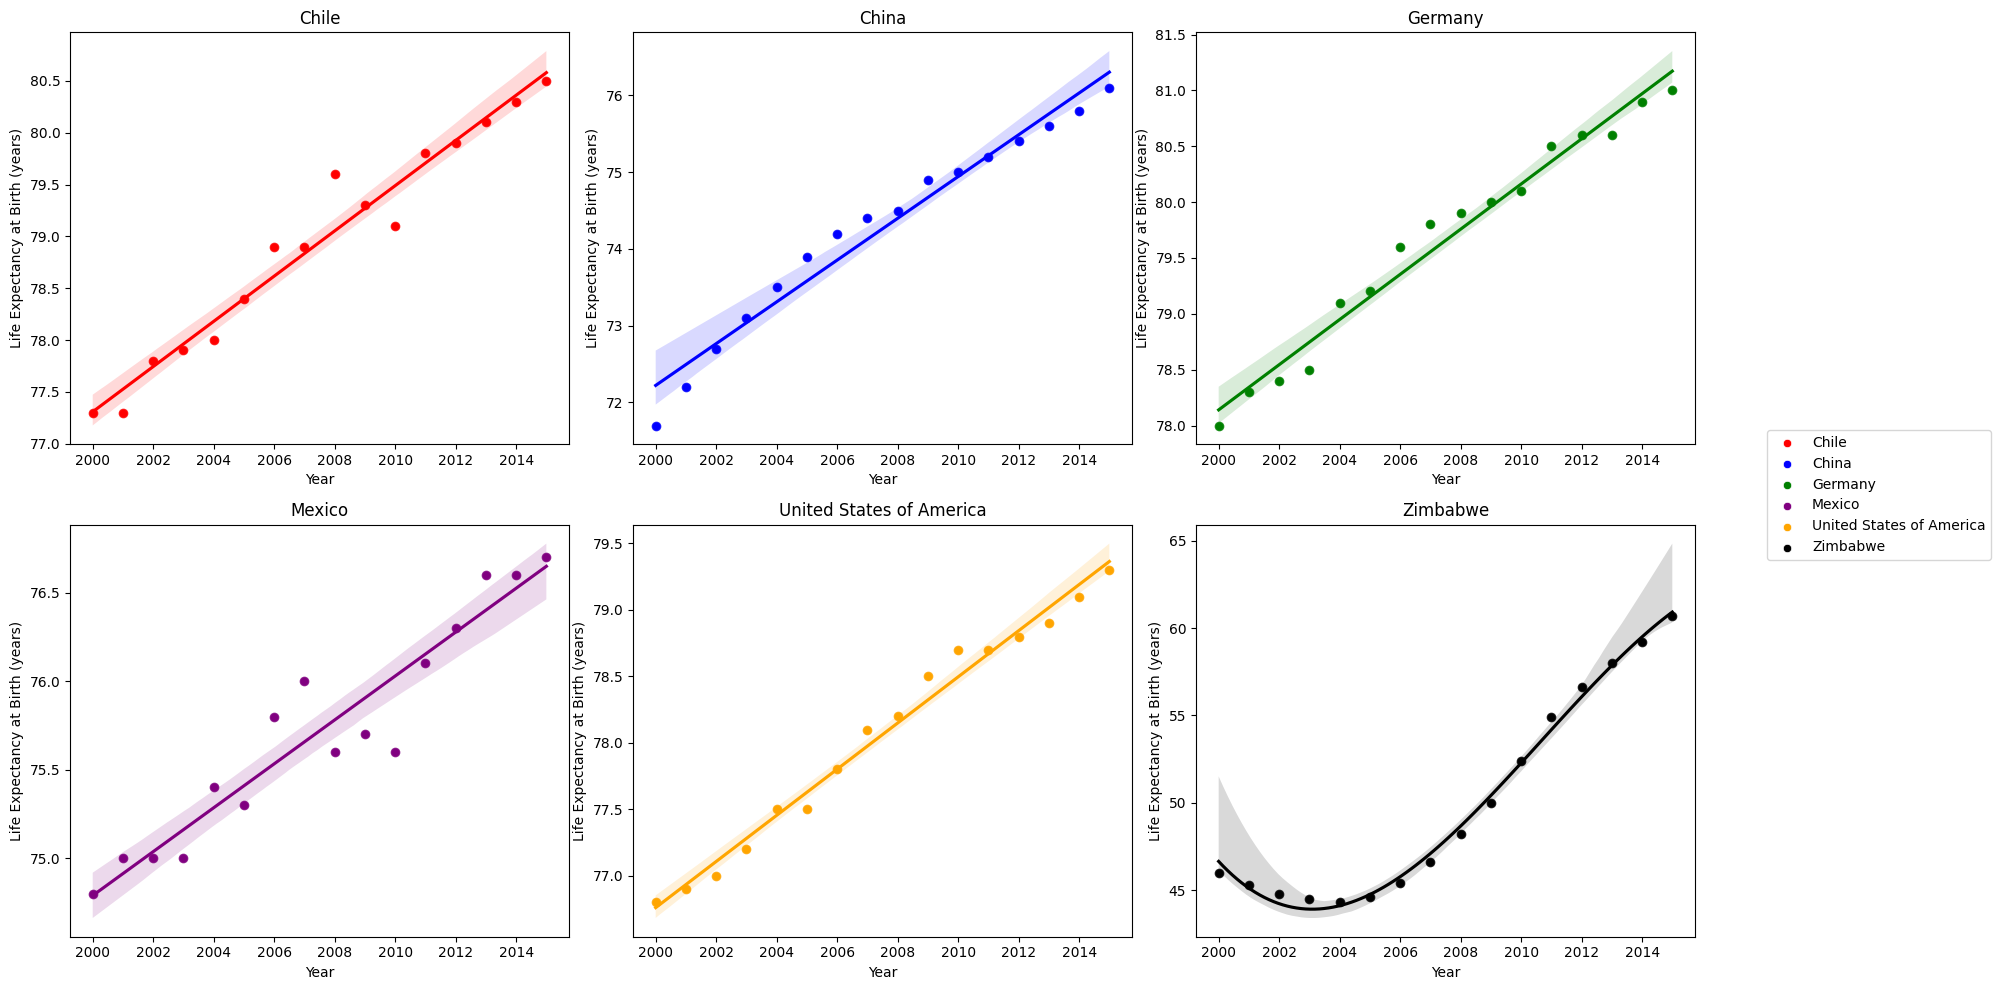

<Figure size 640x480 with 0 Axes>

In [88]:
fig, ax = plt.subplots(2,3, figsize=(20,10))
plot_leab_vs_year(df_chile, "Chile", "red", 1, 1)
plot_leab_vs_year(df_china, "China", "blue", 2, 1)
plot_leab_vs_year(df_germany, "Germany", "green", 3, 1)
plot_leab_vs_year(df_mexico, "Mexico", "purple", 4, 1)
plot_leab_vs_year(df_us, "United States of America", "orange", 5, 1)
plot_leab_vs_year(df_zimbabwe, "Zimbabwe", "black", 6, 3)
fig.legend(loc=7)
fig.tight_layout()
fig.subplots_adjust(right=0.85)
plt.show()
plt.clf()

Most of the data above shows shows that the love expentancy at birth tends to have a strong positive linear coorelation with time. The only country that does now show this is Zimbabwe, which dipped for about 4 years before starting to rise.

## Plotting the data - GDP vs. Life Expectancy at Birth (years)

This will use much the same code as the last part, so I will refactor the function for the new purpose.

In [86]:
def plot_leab_vs_gdp(df, country, color,  location, order):
  ax = plt.subplot(2,3,location)
  sns.scatterplot(data=df, y="GDP", x="LEABY", ax=ax, label=country, color=color)
  sns.regplot(data=df, y="GDP", x="LEABY", color=color, order=order)
  ax.legend().set_visible(False)
  ax.set_title(country)
  ax.set_xlabel("Life Expectancy at Birth (years)")
  ax.set_ylabel("GDP in Trillions of U.S. Dollars")

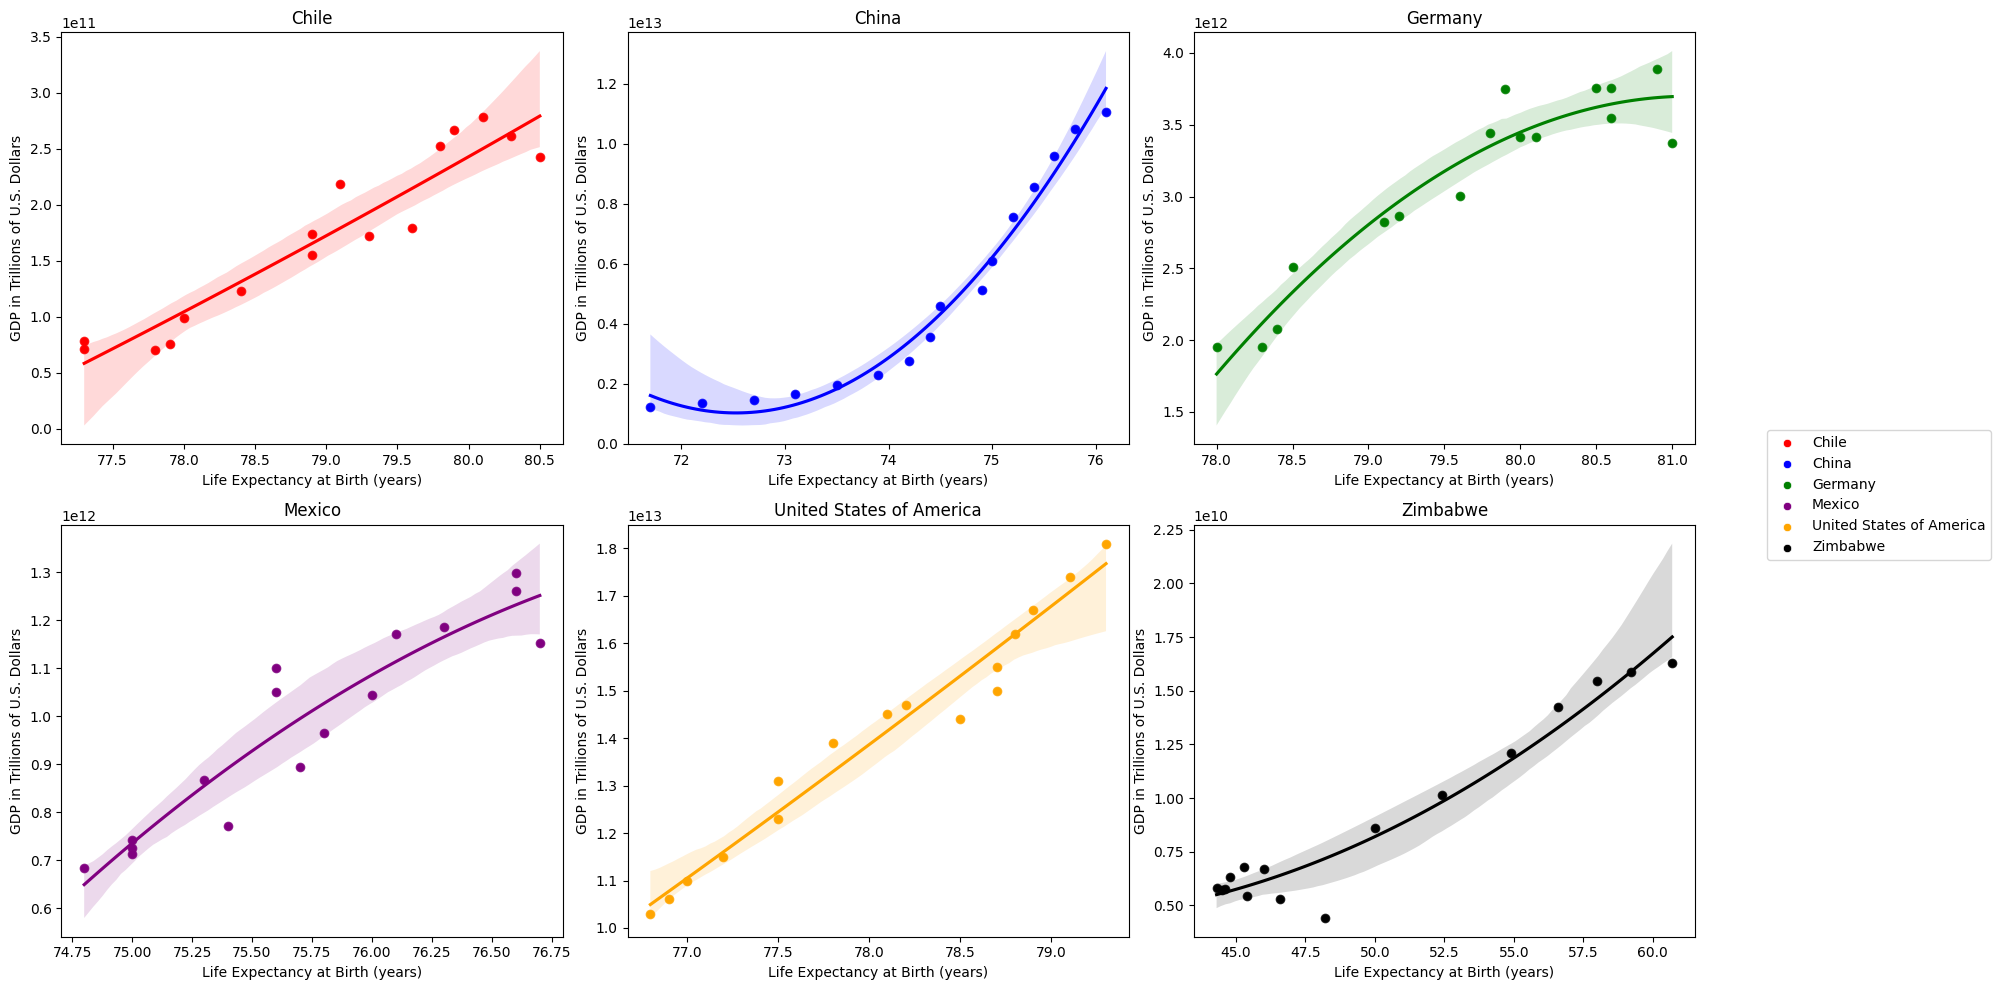

<Figure size 640x480 with 0 Axes>

In [94]:
fig, ax = plt.subplots(2,3, figsize=(20,10))
plot_leab_vs_gdp(df_chile, "Chile", "red", 1, 2)
plot_leab_vs_gdp(df_china, "China", "blue", 2, 2)
plot_leab_vs_gdp(df_germany, "Germany", "green", 3, 2)
plot_leab_vs_gdp(df_mexico, "Mexico", "purple", 4, 2)
plot_leab_vs_gdp(df_us, "United States of America", "orange", 5, 2)
plot_leab_vs_gdp(df_zimbabwe, "Zimbabwe", "black", 6, 2)
fig.legend(loc=7)
fig.tight_layout()
fig.subplots_adjust(right=0.85)
plt.show()
plt.clf()

# Conclusions
When it comes to life expectancy at birth as seen as a time series from 2000 to 2014, it can be seen that life expectancy seems to have a positive coorelation with the year. Zimbabwe is the outlier, because it dips first before increasing rapidly. 
As for the connection with GDP, this is also generally a positive linear coorelation. China's life expectancy seems to be increasing more rapidly, while it seems to be leveling out for Germany within the time period. 